###### The cell above loads the visual style of the notebook when run.

In [1]:
from IPython.core.display import HTML
css_file = '../styles.css'
HTML(open(css_file, "r").read())

# Analyzing data from multiple files

<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span>Learning Objectives</h2>
</div>
</section>

> *   Use a library function to get a list of filenames that match a simple wildcard pattern.
> *   Use a for loop to process multiple files.

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with an amusing name:

In [3]:
import glob

The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the Jupyter notebooks in the current directory:

In [4]:
print (glob.glob("*.ipynb"))

['07-errors.ipynb', '04-files.ipynb', '05-cond.ipynb', '03-lists.ipynb', '01-numpy.ipynb', '02-loop.ipynb', '08-defense.ipynb', '00-Index.ipynb', '06-func.ipynb']


As these examples show, `glob.glob`'s result is a list of strings,
which means we can loop over it to do something with each filename in turn. In our case, the "something" we want to do is generate a plot for each file in our star dataset.

Note that the `glob` function will not necessarily return the files in order.  We can get them in alphabetical order using the `sorted` function:

In [8]:
print(sorted(glob.glob("*.ipynb")))

['00-Index.ipynb', '01-numpy.ipynb', '02-loop.ipynb', '03-lists.ipynb', '04-files.ipynb', '05-cond.ipynb', '06-func.ipynb', '07-errors.ipynb', '08-defense.ipynb']


Let's test it by analyzing the first four files in the list: 

data/star_data_01.csv


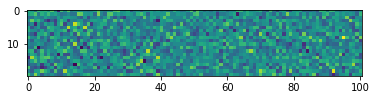

data/star_data_02.csv


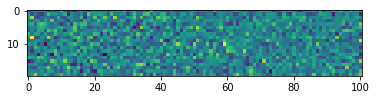

data/star_data_03.csv


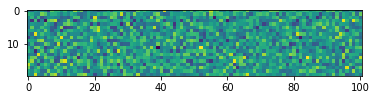

data/star_data_04.csv


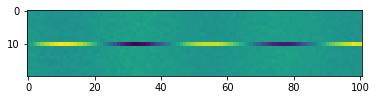

In [7]:
import numpy
import matplotlib.pyplot
%matplotlib inline

filenames = sorted(glob.glob('data/*.csv'))
filenames = filenames[0:4] 
for fn in filenames:
    print (fn)
    
    data = numpy.loadtxt(fname=fn, delimiter=',') # load in the data
    # calculate the average brightness over all stars (rows)
    ave_brightness = data.mean(axis=0) 
    # divide by the average brightness
    processed_data = data/ave_brightness
    
    image = matplotlib.pyplot.imshow(processed_data) 
    matplotlib.pyplot.show(image) 

The first three datasets all look alike: no stars in these datasets seem to show intrinsic variability. The fourth dataset is different however! It looks like one star is changing it's brightness significantly, producing the odd colored stripe across the image.